In [179]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [180]:
df = pd.read_csv('regression_data.csv')

df= df.iloc[1:, 0]
df

1      34,826
2      38,940
3      37,131
4      43,559
5      44,325
6      42,657
7      43,600
8      44,599
9      44,165
10     46,705
11     43,562
12    38681.0
Name: 0, dtype: object

In [181]:
train = df.iloc[:-3]
test = df.iloc[-3:]
train.values

array(['34,826', '38,940', '37,131', '43,559', '44,325', '42,657',
       '43,600', '44,599', '44,165'], dtype=object)

In [182]:
yframe = pd.DataFrame({'Year': range(2003, 2012)})
yframe

,Year
0,2003
1,2004
2,2005
3,2006
4,2007
5,2008
6,2009
7,2010
8,2011


In [183]:
train

1    34,826
2    38,940
3    37,131
4    43,559
5    44,325
6    42,657
7    43,600
8    44,599
9    44,165
Name: 0, dtype: object

In [184]:
yframe

,Year
0,2003
1,2004
2,2005
3,2006
4,2007
5,2008
6,2009
7,2010
8,2011


In [185]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [186]:
train_data = pd.Series(train.values)
y_data = pd.Series(yframe.values.flatten().tolist(), name='Year')

Mean Squared Error (Polynomial Regression): 1494259.2617551067
R-squared (Polynomial Regression): 81.34%
Predicted X for 2022 (Polynomial Regression): 8019.551021099091


c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\pavan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


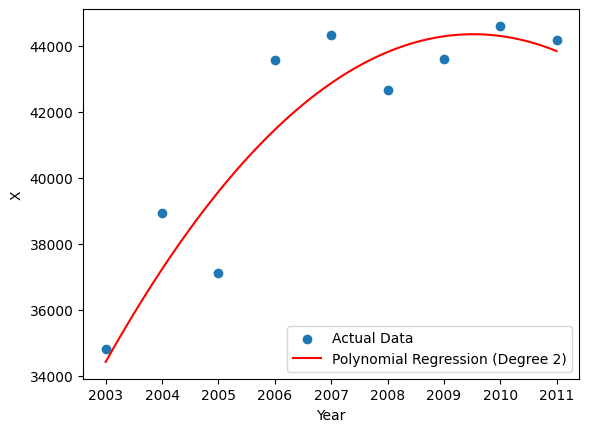

In [187]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming train_data and y_data are already defined

# Preprocess the train_data
train_data = train_data.str.replace(',', '').astype(float)

# Combine features and labels into a single DataFrame
df = pd.DataFrame({'X': train_data, 'Year': y_data})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Year']], df['X'], test_size=0.2, random_state=42)

# Use Polynomial Regression
degree = 2  # You can experiment with different polynomial degrees
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error (Polynomial Regression): {mse_poly}')
print(f'R-squared (Polynomial Regression): {r2_poly * 100:.2f}%')

# Now you can use the polynomial model to predict X for a particular year
year_to_predict = 2022  # Replace with the year you want to predict
X_to_predict_poly = poly_features.transform(np.array([[year_to_predict]]))
predicted_X_poly = poly_model.predict(X_to_predict_poly)
print(f'Predicted X for {year_to_predict} (Polynomial Regression): {predicted_X_poly[0]}')

# Plotting the polynomial regression curve
X_plot = np.linspace(min(df['Year']), max(df['Year']), 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot_poly = poly_model.predict(X_plot_poly)

plt.scatter(df['Year'], df['X'], label='Actual Data')
plt.plot(X_plot, y_plot_poly, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Year')
plt.ylabel('X')
plt.legend()
plt.show()
